Processing and training NN for Dataset 1...
Epoch 1/500
12/12 [==============================] - 0s 662us/step - loss: 0.1752
Epoch 2/500
12/12 [==============================] - 0s 573us/step - loss: 0.1184
Epoch 3/500
12/12 [==============================] - 0s 546us/step - loss: 0.0962
Epoch 4/500
12/12 [==============================] - 0s 578us/step - loss: 0.0802
Epoch 5/500
12/12 [==============================] - 0s 610us/step - loss: 0.0743
Epoch 6/500
12/12 [==============================] - 0s 585us/step - loss: 0.0666
Epoch 7/500
12/12 [==============================] - 0s 604us/step - loss: 0.0555
Epoch 8/500
12/12 [==============================] - 0s 512us/step - loss: 0.0461
Epoch 9/500
12/12 [==============================] - 0s 485us/step - loss: 0.0371
Epoch 10/500
12/12 [==============================] - 0s 508us/step - loss: 0.0274
Epoch 11/500
12/12 [==============================] - 0s 427us/step - loss: 0.0186
Epoch 12/500
12/12 [==============================] 

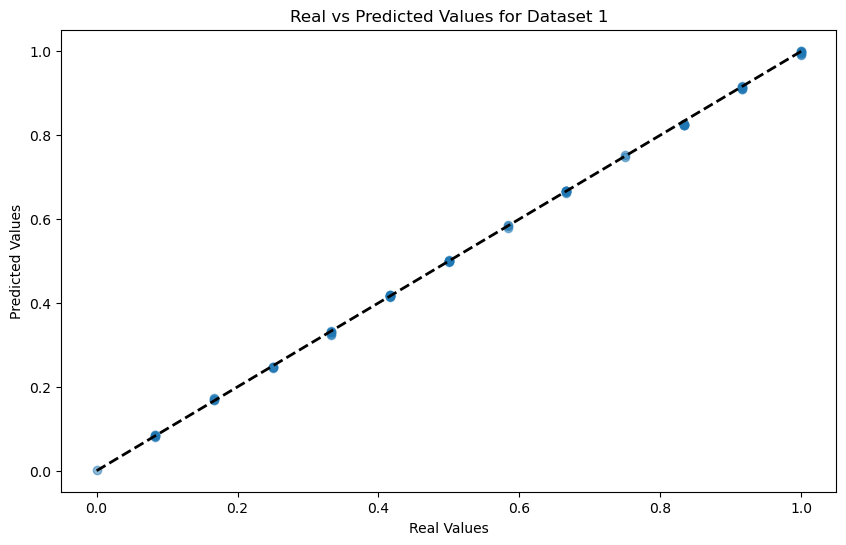

Processing and training NN for Dataset 2...


Epoch 1/500
25/25 [==============================] - 0s 593us/step - loss: 0.1053
Epoch 2/500
25/25 [==============================] - 0s 513us/step - loss: 0.0138
Epoch 3/500
25/25 [==============================] - 0s 536us/step - loss: 0.0067
Epoch 4/500
25/25 [==============================] - 0s 478us/step - loss: 0.0052
Epoch 5/500
25/25 [==============================] - 0s 401us/step - loss: 0.0043
Epoch 6/500
25/25 [==============================] - 0s 392us/step - loss: 0.0037
Epoch 7/500
25/25 [==============================] - 0s 373us/step - loss: 0.0033
Epoch 8/500
25/25 [==============================] - 0s 401us/step - loss: 0.0030
Epoch 9/500
25/25 [==============================] - 0s 381us/step - loss: 0.0026
Epoch 10/500
25/25 [==============================] - 0s 609us/step - loss: 0.0024
Epoch 11/500
25/25 [==============================] - 0s 384us/step - loss: 0.0022
Epoch 12/500
25/25 [==============================] - 0s 388us/step - loss: 0.0022
Epoch 13/500


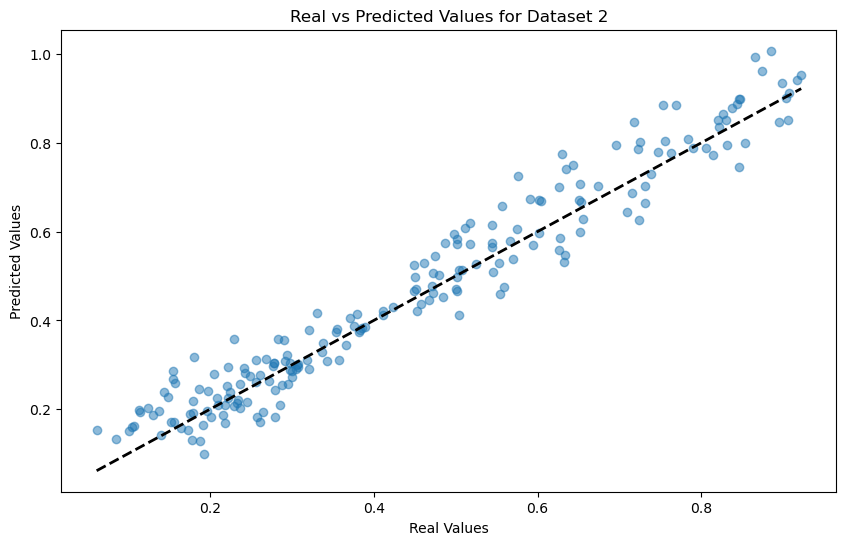

Processing and training NN for Dataset 3...


Epoch 1/500
11/11 [==============================] - 0s 645us/step - loss: 0.0339
Epoch 2/500
11/11 [==============================] - 0s 585us/step - loss: 0.0147
Epoch 3/500
11/11 [==============================] - 0s 563us/step - loss: 0.0091
Epoch 4/500
11/11 [==============================] - 0s 590us/step - loss: 0.0071
Epoch 5/500
11/11 [==============================] - 0s 545us/step - loss: 0.0062
Epoch 6/500
11/11 [==============================] - 0s 585us/step - loss: 0.0059
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 8/500
11/11 [==============================] - 0s 861us/step - loss: 0.0048
Epoch 9/500
11/11 [==============================] - 0s 556us/step - loss: 0.0047
Epoch 10/500
11/11 [==============================] - 0s 466us/step - loss: 0.0046
Epoch 11/500
11/11 [==============================] - 0s 442us/step - loss: 0.0046
Epoch 12/500
11/11 [==============================] - 0s 498us/step - loss: 0.0041
Epoch 13/500
11

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true).flatten(), np.array(y_pred).flatten()  # Ensure both are 1-dimensional
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100


def process_and_train_nn(dataset, input_columns, output_column, test_size, epochs, learning_rate):
    X = dataset[input_columns]
    y = dataset[output_column].values.reshape(-1, 1)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)
    
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    model.fit(X_train, y_train, epochs=epochs, verbose=1)
    
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions.flatten())
    mse = mean_squared_error(y_test, predictions.flatten())
    mape = calculate_mape(y_test, predictions.flatten())
    
    r2 = r2_score(y_test, predictions.flatten())  # Calculate R-squared
    
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.2f}%, R²: {r2:.4f}")
    
    return X_test, y_test, predictions

def plot_real_vs_predicted(y_real, y_predicted, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_real, y_predicted.flatten(), alpha=0.5)
    plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=2)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Real vs Predicted Values for {dataset_name}')
    plt.show()

# Preloaded datasets
dataset1 = pd.read_csv('normalized_dataset1.csv')
dataset2 = pd.read_csv('normalized_dataset2.csv')
dataset3 = pd.read_csv('normalized_dataset3.csv')

# Adjusting as per the requirement to drop the last column from dataset1
dataset1.drop(dataset1.columns[-1], axis=1, inplace=True)

architecture_params = {
    'Dataset 1': {'dataset': dataset1, 'input_columns': dataset1.columns[:-1].tolist(), 'output_column': dataset1.columns[-1], 'test_size': 0.15, 'epochs': 500, 'learning_rate': 0.002},
    'Dataset 2': {'dataset': dataset2, 'input_columns': dataset2.columns[:-1].tolist(), 'output_column': dataset2.columns[-1], 'test_size': 0.20, 'epochs': 500, 'learning_rate': 0.002},
    'Dataset 3': {'dataset': dataset3, 'input_columns': dataset3.columns[:-1].tolist(), 'output_column': dataset3.columns[-1], 'test_size': 0.20, 'epochs': 500, 'learning_rate': 0.002}
}

for dataset_name, params in architecture_params.items():
    print(f"Processing and training NN for {dataset_name}...")
    X_test, y_test, predictions = process_and_train_nn(params['dataset'], params['input_columns'], params['output_column'], params['test_size'], params['epochs'], params['learning_rate'])
    plot_real_vs_predicted(y_test, predictions, dataset_name)
